In [9]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

KLT_transfer() models transfer function $G(s) = \frac{K}{1+sT}e^{-sL}$

In [10]:
def KLT_transfer(Kp,L,T):
    numer = [Kp]
    deno = [T,1]
    
    # modeling the time delay
    delay_approx = ctrl.pade(L,3)
    delay_num, delay_den = delay_approx
    
    system_without_delay = ctrl.TransferFunction(numer, deno)
    delay_tf = ctrl.TransferFunction(delay_num, delay_den)
    system_with_delay = ctrl.series(system_without_delay, delay_tf)
    
    return system_with_delay
    


PI_loopfilter() models PI controller with term $K_p + K_i \frac{1}{s}$

In [11]:
def PI_loopfilter(Kp,Ti):
    Ki = Kp/Ti
    return ctrl.TransferFunction([Kp, Ki], [1, 0]) # (sKp + Ki)/s
    


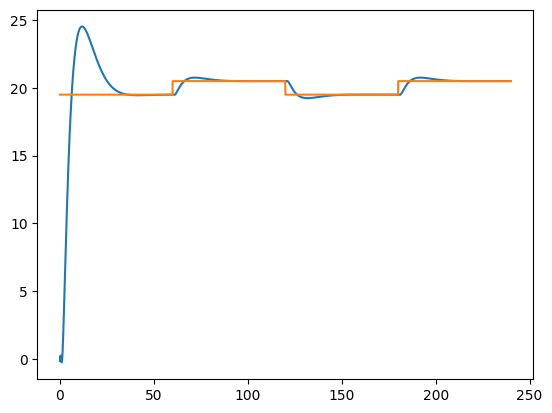

In [12]:
Kp = -0.000912
L = 1.5
T = 110.5

K = 0.15 / Kp + (0.35 - L*T / ((L + T)*(L + T)))*(T / (Kp * L))
Ti = 0.35 * L + 6.7*L*T*T / (T*T + 2*L*T + 10*L*L)

controller = PI_loopfilter(K, Ti)
temp_system = KLT_transfer(Kp, L, T)
closed_loop = ctrl.feedback(controller * temp_system, 1, -1) #system1, system2, feedback or feedforward
#time, response = ctrl.step_response(closed_loop, np.linspace(0,60,500))
times = np.linspace(0, 60*4, 500*4)
dt = times[1] - times[0]
vals = np.concatenate((np.full(500, 19.50), np.full(500, 20.5), np.full(500, 19.5), np.full(500, 20.5)))

state = 0

response = []

for i in range(0, len(times)-1):
    t, r, s = ctrl.forced_response(closed_loop, [times[i], times[i + 1]], [vals[i], vals[i+1]], X0=state, return_x = True) #time, response
    response.append(np.squeeze(r[-1]))
    #print(np.squeeze(r[-1]))
    state = np.squeeze(s[:,-1])

plt.plot(times[:-1], response)
plt.plot(times, vals)
plt.show()